# Tutorial for extracting SEDs from Galacticus output.

Note that to extract an SED Galacticus must have been run with the option to output an array of top hat filters at user-specified wavelengths.

In [1]:
# Import the necessary modules
import sys
import numpy as np
# Import Galacticus-related modules
from galacticus.galaxies import Galaxies
from galacticus.io import GalacticusHDF5
from galacticus.data import GalacticusData
# Import plotting-related modules
import matplotlib
from pylab import *
%matplotlib inline

In this tutorial we will be loading spectra from an example Galacticus HDF5 file stored in the Galacticus 'Datasets' repository. If you do not have this repository downloaded you can download it from **bitbucket.org/galacticusdev/datasets**. 

Once you have downloaded the 'Datasets' repository, you will need to set the environment variable **GALACTICUS_DATA_PATH** to point to the location where you have downloaded 'Datasets'. Addiitionally you may need to also set the variable **GALACTICUS_DYNAMIC_DATA_PATH** to a location where Galacticus can write dynamically created datasets.

In [2]:
# Load the example snapshot file from the Galacticus datasets repository.
DATASETS = GalacticusData()
snapshotFile = DATASETS.search("galacticus.snapshotExample.hdf5")
print("Snapshot file found!")

Snapshot file found!


All galaxy properties are loaded through the **Galaxies** class. We will now create an instance of this class. To do this we need to open the HDF5 file using **GalacticusHDF5** and pass an instance of this class.

In [3]:
# Create instance of GalacticusHDF5 class and open snapshot file (read-only mode).
GH5 = GalacticusHDF5(snapshotFile,'r')
# Create instance of galaxies class.
GALS = Galaxies(GH5)

This is all we need to get started extracting spectra!

To extract spectra we need to provide the **Galaxies** instance with an SED property name. The names have the general nomenclature:

<font color='red'>**component**</font>SpectralEnergyDistribution:<font color='red'>**lowWave**</font>\_<font color='red'>**uppWave**</font>\_<font color='red'>**waveInt**</font>:<font color='red'>**frame**</font>:<font color='red'>**zString**</font>(:fixedWidth<font color='red'>**lineWidth**</font>)(:snr<font color='red'>**ratio**</font>)(:<font color='red'>**recent**</font>)(:<font color='red'>**dustString**</font>)(:<font color='red'>**noLines**</font>)

where

* **component** : The component (disk/bulge) of the galaxy. Should be set to either 'disk', 'spheroid' or 'total'.
* **lowWave**   : The lower wavelength range for the spectra, in Angstroms.
* **uppWave**   : The upper wavelength range for the spectra, in Angstroms.
* **waveInt**   : The wavelength interval for the spectra, in Angstroms.
* **frame**     : The frame for the spectra, i.e. 'rest' of 'observed' frame.
* **zString**   : A string specifiying the redshift of snapshot this galaxy is associated with.
* **lineWidth** : A string specifying width in km/s for emission line Gaussian profiles.
* **ratio**     : A string specifying the S/N ratio to apply to the spectra continua.
* **recent**    : An option to output SED for recent star formation only.
* **dustString**: Optional string specifying dust model to assume.
* **noLines**   : An option to output only the continuum (i.e. no emission lines).

Note that **(...)** correspond to optional commands.

At this point we will choose a redshift and construct the string that we will need to place in any SED dataset name.

In [4]:
z = 1.0
zStr = GH5.getRedshiftString(z)
print("Redshift string is '"+zStr+"'")

Redshift string is 'z1.0000'


At this point we will identify the wavelength range available for the spectra. We will do this by importing the **Continuum** class and providing the function **getAvailableWavelengthRange** with a redshift and a dummy SED dataset name.

Note that this step of identifying the wavelength is not strictly necessary as when the SED is computed the user-specified wavelength range will be truncated to match the range of wavelengths available.

In [5]:
from galacticus.spectralEnergyDistribution.continuum import Continuum
CON = Continuum(GALS)
sedName = "diskSpectralEnergyDistribution:0000.0_9999.9_1000.0:rest:"+zStr
wavelengths = CON.getAvailableWavelengthRange(z,sedName)
print("Wavelength range = "+str(wavelengths.min())+" A - "+str(wavelengths.max())+" A.")

Wavelength range = 2000.0 A - 19500.0 A.


We can now construct an example SED within the desired wavelength range by constructing an appropriate SED dataset name using the above nomenclature and passing this name to the **Galaxies.get** function.

In [6]:
sedName = "diskSpectralEnergyDistribution:5000.0_15000.0_500.0:rest:"+zStr
SED = GALS.get(z,properties=[sedName])

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)


This will return a dictionary containing all data for all of the galaxy properties passed to the **Galaxies.get** function. Each entry of the dictionary is a **Dataset** class, which has:
* a name attribute 'name'
* a data attribute 'data'
* a dictionary of additional attributes 'attr'

In [7]:
print("Name = "+SED[sedName].name)
print("Data:")
print(SED[sedName].data)
print("Additional attributes:")
for i,key in enumerate(SED[sedName].attr.keys()):
    print(" ("+str(i+1)+") "+key+" = ",SED[sedName].attr[key])

Name = diskSpectralEnergyDistribution:5000.0_15000.0_500.0:rest:z1.0000
Data:
[[4.58276963e-01 4.97514431e-01 5.36751898e-01 ... 7.17452704e-01
  7.19324767e-01 7.21196830e-01]
 [8.03351028e-02 8.33145689e-02 8.62940350e-02 ... 9.46616621e-02
  9.40661993e-02 9.34707366e-02]
 [4.50487620e-01 5.11493586e-01 5.72499552e-01 ... 8.89735473e-01
  8.96945476e-01 9.04155480e-01]
 ...
 [1.97693477e-01 2.04622506e-01 2.11551534e-01 ... 2.35691447e-01
  2.34225745e-01 2.32760043e-01]
 [4.09169109e-01 4.39510970e-01 4.69852830e-01 ... 6.17811393e-01
  6.20167503e-01 6.22523612e-01]
 [2.88070904e-04 2.75146261e-04 2.62221619e-04 ... 1.85591677e-04
  1.78217958e-04 1.70844240e-04]]
Additional attributes:
 (1) unitsInSI =  9.999999999999999e-33
 (2) wavelength =  [ 5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000.]
 (3) wavelengthUnitsInSI =  1e-10


### Example 1: Extract SEDs of galaxies at z=1 and plot with S/N=5

In [8]:
z = 1.0
zStr = GH5.getRedshiftString(z)
sedName = "totalSpectralEnergyDistribution:5000.0_15000.0_50.0:observed:"+zStr+":snr5.0"
SED = GALS.get(z,properties=[sedName])

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)


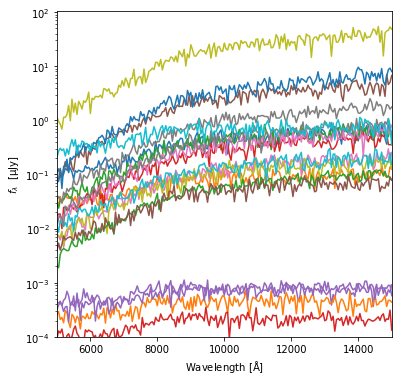

In [9]:
# Plot SEDs of first 5 galaxies
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
N = 20
for i in range(N):
    wavelength = SED[sedName].attr["wavelength"]
    sed = SED[sedName].data[i,:]
    ax.plot(wavelength,sed) 
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(wavelength.min(),wavelength.max())
ax.set_ylim(bottom=1.0e-4)
show()

### Example 2: Plot SED of same galaxy with different S/N ratios

In [10]:
# Compute the SEDs
z = 1.0
zStr = GH5.getRedshiftString(z)
sedNames = ["totalSpectralEnergyDistribution:5000.0_15000.0_10.0:observed:"+zStr+":snr"+str(sn) for sn in "2.0 5.0 10.0 50.0".split()]
SED = GALS.get(z,properties=sedNames)

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)
/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/spectralEnergyDistribution/spectralEnergyDistribution.py:61: RuntimeWarning: invalid value encountered in log10
  sed = np.log10(sed+zeroCorrection)


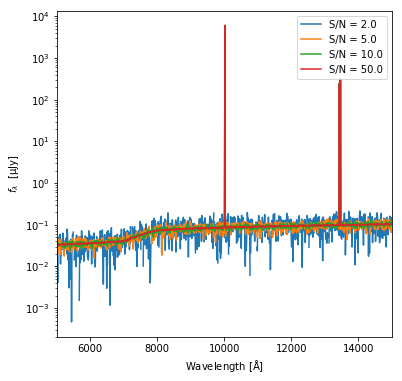

In [11]:
# Plot the SEDs
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
snRatios = "2.0 5.0 10.0 50.0".split()
for i,snr in enumerate(snRatios):  
    name = "totalSpectralEnergyDistribution:5000.0_15000.0_10.0:observed:"+zStr+":snr"+str(snr)
    wavelength = SED[name].attr["wavelength"]
    sed = SED[name].data[1,:]
    ax.plot(wavelength,sed,label="S/N = "+snr) 
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(wavelength.min(),wavelength.max())
ax.legend(loc=0)
show()    

### Example 3: Extract SEDs with and without emission lines

In [12]:
# Compute the SEDs (both with and without emission lines)
z = 1.0
zStr = GH5.getRedshiftString(z)
name = "totalSpectralEnergyDistribution:5000.0_15000.0_10.0:observed:"+zStr+":snr5.0"
sedNames = [name,name+":noLines"]
SED = GALS.get(z,properties=sedNames)

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)
/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/spectralEnergyDistribution/spectralEnergyDistribution.py:61: RuntimeWarning: invalid value encountered in log10
  sed = np.log10(sed+zeroCorrection)


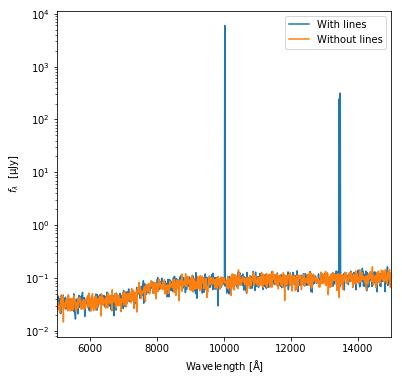

In [13]:
# Plot the SEDs
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
# With lines
wavelength = SED[name].attr["wavelength"]
sed = SED[name].data[1,:]
ax.plot(wavelength,sed,label="With lines")
wavelength = SED[name+":noLines"].attr["wavelength"]
sed = SED[name+":noLines"].data[1,:]
ax.plot(wavelength,sed,label="Without lines")
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(wavelength.min(),wavelength.max())
ax.legend(loc=0)
show()  

### Example 4: Setting the width of the emission line

Emission lines are included into the Galacticus spectra by assuming a Gaussian line profile, with a full-width-half-maximum that is computed using either (i) the circular velocity of the disk or velocity dispersion of the bulge, or (ii) a fixed velocity width in km/s provided by the user.

In [14]:
# Compute the SEDs: one instance with FWHM set using the galaxy velocities and several instances using fixed widths.
z = 1.0
zStr = GH5.getRedshiftString(z)
name = "totalSpectralEnergyDistribution:13050.0_13225.0_2.0:observed:"+zStr
sedNames = [name] + [name+":fixedWidth"+str(w) for w in "50.0 100.0 250.0 500.0".split()]
SED = GALS.get(z,properties=sedNames)

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)
/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/spectralEnergyDistribution/spectralEnergyDistribution.py:61: RuntimeWarning: invalid value encountered in log10
  sed = np.log10(sed+zeroCorrection)


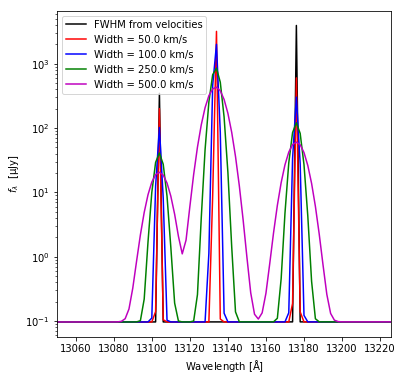

In [15]:
# Plot the SEDs
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
wavelength = SED[name].attr["wavelength"]
sed = SED[name].data[1,:]
ax.plot(wavelength,sed,c='k',label="FWHM from velocities") 
colors = ['r','b','g','m']
widths = "50.0 100.0 250.0 500.0".split()
for i,w in enumerate(widths):  
    iname = name+":fixedWidth"+str(w) 
    wavelength = SED[iname].attr["wavelength"]
    sed = SED[iname].data[1,:]
    ax.plot(wavelength,sed,c=colors[i],label="Width = "+str(w)+" km/s") 
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(wavelength.min(),wavelength.max())
ax.legend(loc=0)
show()   

### Example 5: Introducing dust attenuation

In Galacticus, applying dust attenuation to luminosities is carried out in post-processing. Several dust models are available, including:

* **:dustCompendium** : Uses a library of dust attenuations as a function of galaxy properties computed using the Hyperion code.
* **:dustCalzetti_AvXX**   : Uses the Calzetti et al. (2000) dust law with Av=XX. Other dust screen laws are also available.
* **:dustCharlotFall2000** : Uses the Charlot & Fall (2000) dust model.

These dust models can be applied to the spectra by adding the appropriate dust string to the end of the SED dataset name.

In [20]:
# Compute an SED and apply a Calzetti attenuation law with Av=1.5 (assuming Rv=4.05)
z = 1.0
zStr = GH5.getRedshiftString(z)
name = "totalSpectralEnergyDistribution:5000.0_15000.0_10.0:observed:"+zStr+":snr5.0"
dustString = ":dustCalzetti_Av1.5"
sedNames = [name,name+dustString]
SED = GALS.get(z,properties=sedNames)

/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/hydrogenGasDensity.py:90: RuntimeWarning: invalid value encountered in maximum
  densitySurfaceClouds = np.maximum(densitySurfaceGas,surfaceDensityCritical)
/anaconda3/lib/python3.7/site-packages/galacticus-0.1-py3.7.egg/galacticus/spectralEnergyDistribution/spectralEnergyDistribution.py:61: RuntimeWarning: invalid value encountered in log10
  sed = np.log10(sed+zeroCorrection)


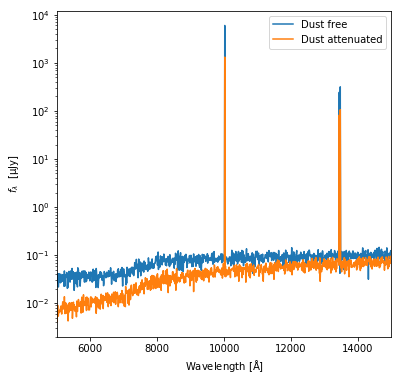

In [21]:
# Plot the SEDs
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
# With lines
wavelength = SED[name].attr["wavelength"]
sed = SED[name].data[1,:]
ax.plot(wavelength,sed,label="Dust free")
wavelength = SED[name+dustString].attr["wavelength"]
sed = SED[name+dustString].data[1,:]
ax.plot(wavelength,sed,label="Dust attenuated")
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(wavelength.min(),wavelength.max())
ax.legend(loc=0)
show()  

In [22]:
# Close the Galacticus HDF5 file
GALS.GH5Obj.close()
GH5.close()